In [1]:
#!pip install nltk
!pip install beautifulsoup4

In [21]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import pos_tag
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk import ne_chunk
from nltk import word_tokenize, pos_tag, ne_chunk
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np


In [22]:
# Download the 'maxent_ne_chunker' resource
import nltk

# Download the 'maxent_ne_chunker' resource
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('words')


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/yanasadchy/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [23]:
from src.common_basis import *

i = load_incel_parquet()

In [24]:
s = i.incel_posts

# Take a sample DataFrame
#temp = pd.read_parquet('/Users/yanasadchy/Documents/GitHub/disc-analysis/data/input/parquet/incel_sample_posts.parquet')
temp = s.head(1000)

# Make a new column to clean up
temp['post_content_clean'] = temp['post_html']

# Redundant
data = temp.post_content.sample(1000)

df = pd.DataFrame(data)
temp

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/1497620782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['post_content_clean'] = temp['post_html']


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,"<div class=""message-content js-messageContent""..."
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,"<div class=""message-content js-messageContent""..."
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,"<div class=""message-content js-messageContent""..."
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,"<div class=""message-content js-messageContent""..."
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,"<div class=""message-content js-messageContent""..."
...,...,...,...,...,...,...,...,...,...
995,1464,post-4357043,34,2020-04-20 22:01:52,I think if any of them will come back again,"<div class=""message-content js-messageContent""...",75,36,"<div class=""message-content js-messageContent""..."
996,1465,post-240785,235,2018-01-21 16:12:26,The time has come. Execute Order 66.,"<div class=""message-content js-messageContent""...",72,101,"<div class=""message-content js-messageContent""..."
997,1469,post-240823,456,2018-01-21 16:22:55,7 days before you pull the trigger?,"<div class=""message-content js-messageContent""...",72,105,"<div class=""message-content js-messageContent""..."
998,1488,post-241149,438,2018-01-21 17:47:19,My brain hurts from reading your conversation.,"<div class=""message-content js-messageContent""...",72,124,"<div class=""message-content js-messageContent""..."


In [26]:
%%time
# remove HTML shit
from bs4 import BeautifulSoup

temp['post_content_clean'] = temp['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

temp['post_content_clean']

CPU times: user 608 ms, sys: 26.1 ms, total: 634 ms
Wall time: 876 ms


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0      Or maybe she just realized Chad will never com...
1      Ofc Chad will never commit to a crazy bpd toilet.
2         Ill give her a ride in exchange for some head.
3      A man doing the same thing would have been sub...
4                                         Indeed, it is.
                             ...                        
995          I think if any of them will come back again
996                 The time has come. Execute Order 66.
997                  7 days before you pull the trigger?
998       My brain hurts from reading your conversation.
999                                           u r mother
Name: post_content_clean, Length: 1000, dtype: object

In [27]:
%%time
# Remove stop words
stop_words = set(stopwords.words('english'))

# Remove stop words
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return ' '.join(filtered_tokens)

temp.post_content_clean = temp.post_content_clean.apply(remove_stop_words)

CPU times: user 109 ms, sys: 4.08 ms, total: 113 ms
Wall time: 114 ms


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [28]:
%%time
# Remove special symbols from 'post_content' column
import re

temp['post_content_clean'] = temp['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

CPU times: user 2.15 ms, sys: 207 µs, total: 2.35 ms
Wall time: 2.18 ms


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
%%time
# Remove named entities from 'post_content' column
def remove_named_entities(text):
    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)
    entities = nltk.ne_chunk(tagged, binary=True)
    filtered_tokens = [t[0] for t in entities if not isinstance(t, nltk.tree.Tree)]
    return ' '.join(filtered_tokens)

temp['post_content_clean'] = temp['post_content_clean'].apply(remove_named_entities)

temp

CPU times: user 966 ms, sys: 51.9 ms, total: 1.02 s
Wall time: 1.2 s


<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,maybe realized Chad never commit
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,Chad never commit crazy bpd toilet
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,give ride exchange head
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,Indeed
...,...,...,...,...,...,...,...,...,...
995,1464,post-4357043,34,2020-04-20 22:01:52,I think if any of them will come back again,"<div class=""message-content js-messageContent""...",75,36,think come back
996,1465,post-240785,235,2018-01-21 16:12:26,The time has come. Execute Order 66.,"<div class=""message-content js-messageContent""...",72,101,time come Order 66
997,1469,post-240823,456,2018-01-21 16:22:55,7 days before you pull the trigger?,"<div class=""message-content js-messageContent""...",72,105,7 days pull trigger
998,1488,post-241149,438,2018-01-21 17:47:19,My brain hurts from reading your conversation.,"<div class=""message-content js-messageContent""...",72,124,brain hurts reading conversation


In [30]:
# Function to remove one-letter long words
def remove_one_letter_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if len(word) > 1]
    return ' '.join(filtered_words)

# Apply the function to the 'post_content' column
temp['post_content_clean'] = temp['post_content_clean'].apply(remove_one_letter_words)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/1927914125.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['post_content_clean'] = temp['post_content_clean'].apply(remove_one_letter_words)


In [31]:
%%time
# Word usage statistics
def get_word_usage(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    return fdist

temp['word_usage'] = temp.post_content_clean.apply(get_word_usage)

CPU times: user 67.6 ms, sys: 3.37 ms, total: 71 ms
Wall time: 70.8 ms


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [32]:
%%time
# Extract main topics
def extract_main_topics(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    noun_phrases = []
    for word, tag in pos_tags:
        if 'NN' in tag:
            noun_phrases.append(lemmatizer.lemmatize(word, pos='n'))
    return noun_phrases

temp['main_topics'] = temp.post_content_clean.apply(extract_main_topics)

# Output the DataFrame with results
print(temp)


     post_id   post_id_str  poster_id          time_posted   
0          1  post-8897672          0  2022-06-02 01:02:35  \
1          2  post-8897678          1  2022-06-02 01:04:16   
2          3  post-8897741          2  2022-06-02 01:12:32   
3          4  post-8897798          0  2022-06-02 01:20:35   
4          5  post-8898099          3  2022-06-02 02:25:56   
..       ...           ...        ...                  ...   
995     1464  post-4357043         34  2020-04-20 22:01:52   
996     1465   post-240785        235  2018-01-21 16:12:26   
997     1469   post-240823        456  2018-01-21 16:22:55   
998     1488   post-241149        438  2018-01-21 17:47:19   
999      759  post-3663857        101  2020-01-17 16:02:47   

                                          post_content   
0    Or maybe she just realized Chad will never com...  \
1    Ofc Chad will never commit to a crazy bpd toilet.   
2       Ill give her a ride in exchange for some head.   
3    A man doing the sa

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [33]:
temp

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1,maybe realized Chad never commit,"{'maybe': 1, 'realized': 1, 'Chad': 1, 'never'...",[Chad]
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2,Chad never commit crazy bpd toilet,"{'Chad': 1, 'never': 1, 'commit': 1, 'crazy': ...","[Chad, bpd, toilet]"
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3,give ride exchange head,"{'give': 1, 'ride': 1, 'exchange': 1, 'head': 1}","[ride, exchange, head]"
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...,"{'man': 1, 'thing': 1, 'would': 1, 'subdued': ...","[man, thing, officer, peace, world]"
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5,Indeed,{'Indeed': 1},[]
...,...,...,...,...,...,...,...,...,...,...,...
995,1464,post-4357043,34,2020-04-20 22:01:52,I think if any of them will come back again,"<div class=""message-content js-messageContent""...",75,36,think come back,"{'think': 1, 'come': 1, 'back': 1}",[think]
996,1465,post-240785,235,2018-01-21 16:12:26,The time has come. Execute Order 66.,"<div class=""message-content js-messageContent""...",72,101,time come Order 66,"{'time': 1, 'come': 1, 'Order': 1, '66': 1}","[time, Order]"
997,1469,post-240823,456,2018-01-21 16:22:55,7 days before you pull the trigger?,"<div class=""message-content js-messageContent""...",72,105,days pull trigger,"{'days': 1, 'pull': 1, 'trigger': 1}","[day, trigger]"
998,1488,post-241149,438,2018-01-21 17:47:19,My brain hurts from reading your conversation.,"<div class=""message-content js-messageContent""...",72,124,brain hurts reading conversation,"{'brain': 1, 'hurts': 1, 'reading': 1, 'conver...","[brain, hurt, conversation]"


<Figure size 1000x600 with 0 Axes>

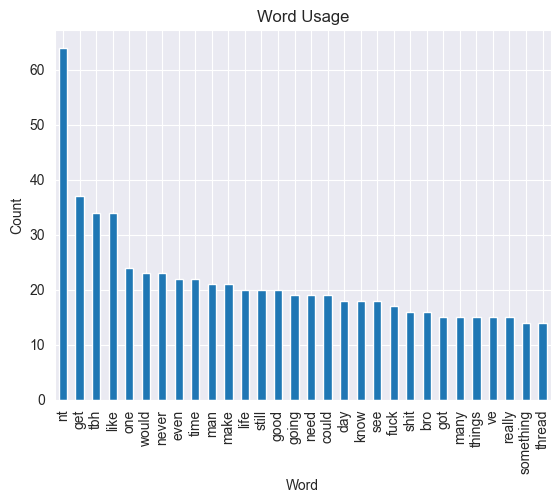

CPU times: user 829 ms, sys: 94.8 ms, total: 924 ms
Wall time: 731 ms


In [34]:
%%time
# Visualize the word use (takes few minutes time)
import matplotlib.pyplot as plt


word_usage = temp['word_usage'].sum()
word_df = pd.DataFrame.from_dict(word_usage, orient='index', columns=['Count'])
word_df = word_df.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

### build a network from words

In [35]:
len(word_df.index.to_list())
# select top 100 topics
top_topics_list = word_df.index.to_list()[:10]

# reserv copy of the temp
df = temp

# Function to check if a row contains any word from the top_topics_list
def contains_top_topic(row):
    for topic in top_topics_list:
        if topic in row:
            return True
    return False

# Remove rows that don't contain words from the top_topics_list
df = df[df['main_topics'].apply(contains_top_topic)]
df

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...,"{'man': 1, 'thing': 1, 'would': 1, 'subdued': ...","[man, thing, officer, peace, world]"
48,58,post-3703826,44,2020-01-24 13:53:00,I see you've been post maxing a lot lately. Tr...,"<div class=""message-content js-messageContent""...",4,15,see ve post maxing lot lately Trying get 5000,"{'see': 1, 've': 1, 'post': 1, 'maxing': 1, 'l...","[post, maxing, lot, get]"
49,60,post-3703833,45,2020-01-24 13:53:47,Brutal stuff man,"<div class=""message-content js-messageContent""...",4,17,stuff man,"{'stuff': 1, 'man': 1}","[stuff, man]"
63,54,post-3702998,43,2020-01-24 08:52:01,ShySaxon said: I woke up to 16 this morni...,"<div class=""message-content js-messageContent""...",4,11,brag tbh,"{'brag': 1, 'tbh': 1}","[brag, tbh]"
79,67,post-3703871,48,2020-01-24 13:58:08,FastBananaCEO said: Wtf I never knew abou...,"<div class=""message-content js-messageContent""...",4,24,get flooded alerts one point got 300 alerts 24h,"{'get': 1, 'flooded': 1, 'alerts': 2, 'one': 1...","[get, alert, point, alert]"
...,...,...,...,...,...,...,...,...,...,...,...
946,1371,post-239965,445,2018-01-21 12:17:25,"It's hard to get revenge as an Incel, when alm...","<div class=""message-content js-messageContent""...",72,4,hard get revenge Incel almost everything stack...,"{'hard': 1, 'get': 1, 'revenge': 2, 'Incel': 1...","[get, revenge, Incel, everything, revenge, end]"
967,736,post-8322815,116,2022-03-27 21:10:29,Indari said: how do people afford anythin...,"<div class=""message-content js-messageContent""...",43,25,probably exaggerating ca nt worse worse upper ...,"{'probably': 1, 'exaggerating': 1, 'ca': 1, 'n...","[class, sure, nt]"
971,1427,post-2699404,115,2019-07-08 16:21:09,i couldn't do that man the blackpill is everyw...,"<div class=""message-content js-messageContent""...",74,6,could nt man blackpill everywhere,"{'could': 1, 'nt': 1, 'man': 1, 'blackpill': 1...","[man, blackpill]"
987,1446,post-4333665,455,2020-04-19 07:37:50,Didn't read,"<div class=""message-content js-messageContent""...",75,18,nt read,"{'nt': 1, 'read': 1}",[nt]


In [36]:
# select a subset
df = df.head(900)
df

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4,man thing would subdued nearby officer immedia...,"{'man': 1, 'thing': 1, 'would': 1, 'subdued': ...","[man, thing, officer, peace, world]"
48,58,post-3703826,44,2020-01-24 13:53:00,I see you've been post maxing a lot lately. Tr...,"<div class=""message-content js-messageContent""...",4,15,see ve post maxing lot lately Trying get 5000,"{'see': 1, 've': 1, 'post': 1, 'maxing': 1, 'l...","[post, maxing, lot, get]"
49,60,post-3703833,45,2020-01-24 13:53:47,Brutal stuff man,"<div class=""message-content js-messageContent""...",4,17,stuff man,"{'stuff': 1, 'man': 1}","[stuff, man]"
63,54,post-3702998,43,2020-01-24 08:52:01,ShySaxon said: I woke up to 16 this morni...,"<div class=""message-content js-messageContent""...",4,11,brag tbh,"{'brag': 1, 'tbh': 1}","[brag, tbh]"
79,67,post-3703871,48,2020-01-24 13:58:08,FastBananaCEO said: Wtf I never knew abou...,"<div class=""message-content js-messageContent""...",4,24,get flooded alerts one point got 300 alerts 24h,"{'get': 1, 'flooded': 1, 'alerts': 2, 'one': 1...","[get, alert, point, alert]"
...,...,...,...,...,...,...,...,...,...,...,...
946,1371,post-239965,445,2018-01-21 12:17:25,"It's hard to get revenge as an Incel, when alm...","<div class=""message-content js-messageContent""...",72,4,hard get revenge Incel almost everything stack...,"{'hard': 1, 'get': 1, 'revenge': 2, 'Incel': 1...","[get, revenge, Incel, everything, revenge, end]"
967,736,post-8322815,116,2022-03-27 21:10:29,Indari said: how do people afford anythin...,"<div class=""message-content js-messageContent""...",43,25,probably exaggerating ca nt worse worse upper ...,"{'probably': 1, 'exaggerating': 1, 'ca': 1, 'n...","[class, sure, nt]"
971,1427,post-2699404,115,2019-07-08 16:21:09,i couldn't do that man the blackpill is everyw...,"<div class=""message-content js-messageContent""...",74,6,could nt man blackpill everywhere,"{'could': 1, 'nt': 1, 'man': 1, 'blackpill': 1...","[man, blackpill]"
987,1446,post-4333665,455,2020-04-19 07:37:50,Didn't read,"<div class=""message-content js-messageContent""...",75,18,nt read,"{'nt': 1, 'read': 1}",[nt]


In [37]:
%%time
# Drop empty rows
#df.dropna(subset=['main_topics'], inplace=True)

# Remove rows with lists containing only one value
df['main_topics'] = df['main_topics'].apply(lambda x: x if len(x) > 1 else np.nan)
df.dropna(subset=['main_topics'], inplace=True)

# Create co-occurrence matrix
mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df['main_topics']), columns=mlb.classes_, index=df.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Print the co-occurrence matrix
print(co_occurrence_matrix)

          Always  Anything  Buy  CarCasS  Congrats  DM  Da  Disparage   
Always         1         0    0        0         0   0   0          0  \
Anything       0         1    0        0         0   0   0          0   
Buy            0         0    1        0         0   0   0          0   
CarCasS        0         0    0        1         0   0   0          0   
Congrats       0         0    0        0         3   0   0          0   
...          ...       ...  ...      ...       ...  ..  ..        ...   
worry          0         0    0        0         0   0   0          0   
worth          0         0    0        0         0   0   0          0   
yEarS          0         0    0        1         0   0   0          0   
year           0         0    0        1         0   0   1          0   
youtuber       0         0    0        0         0   0   0          0   

          Erudition  Finally  ...  week  wine  woman  work  world  worry   
Always            0        0  ...     0     0  

### Visualize co-occurrence matrix

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3484531208.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(normalized_matrix, cmap=cm.get_cmap('Blues'))


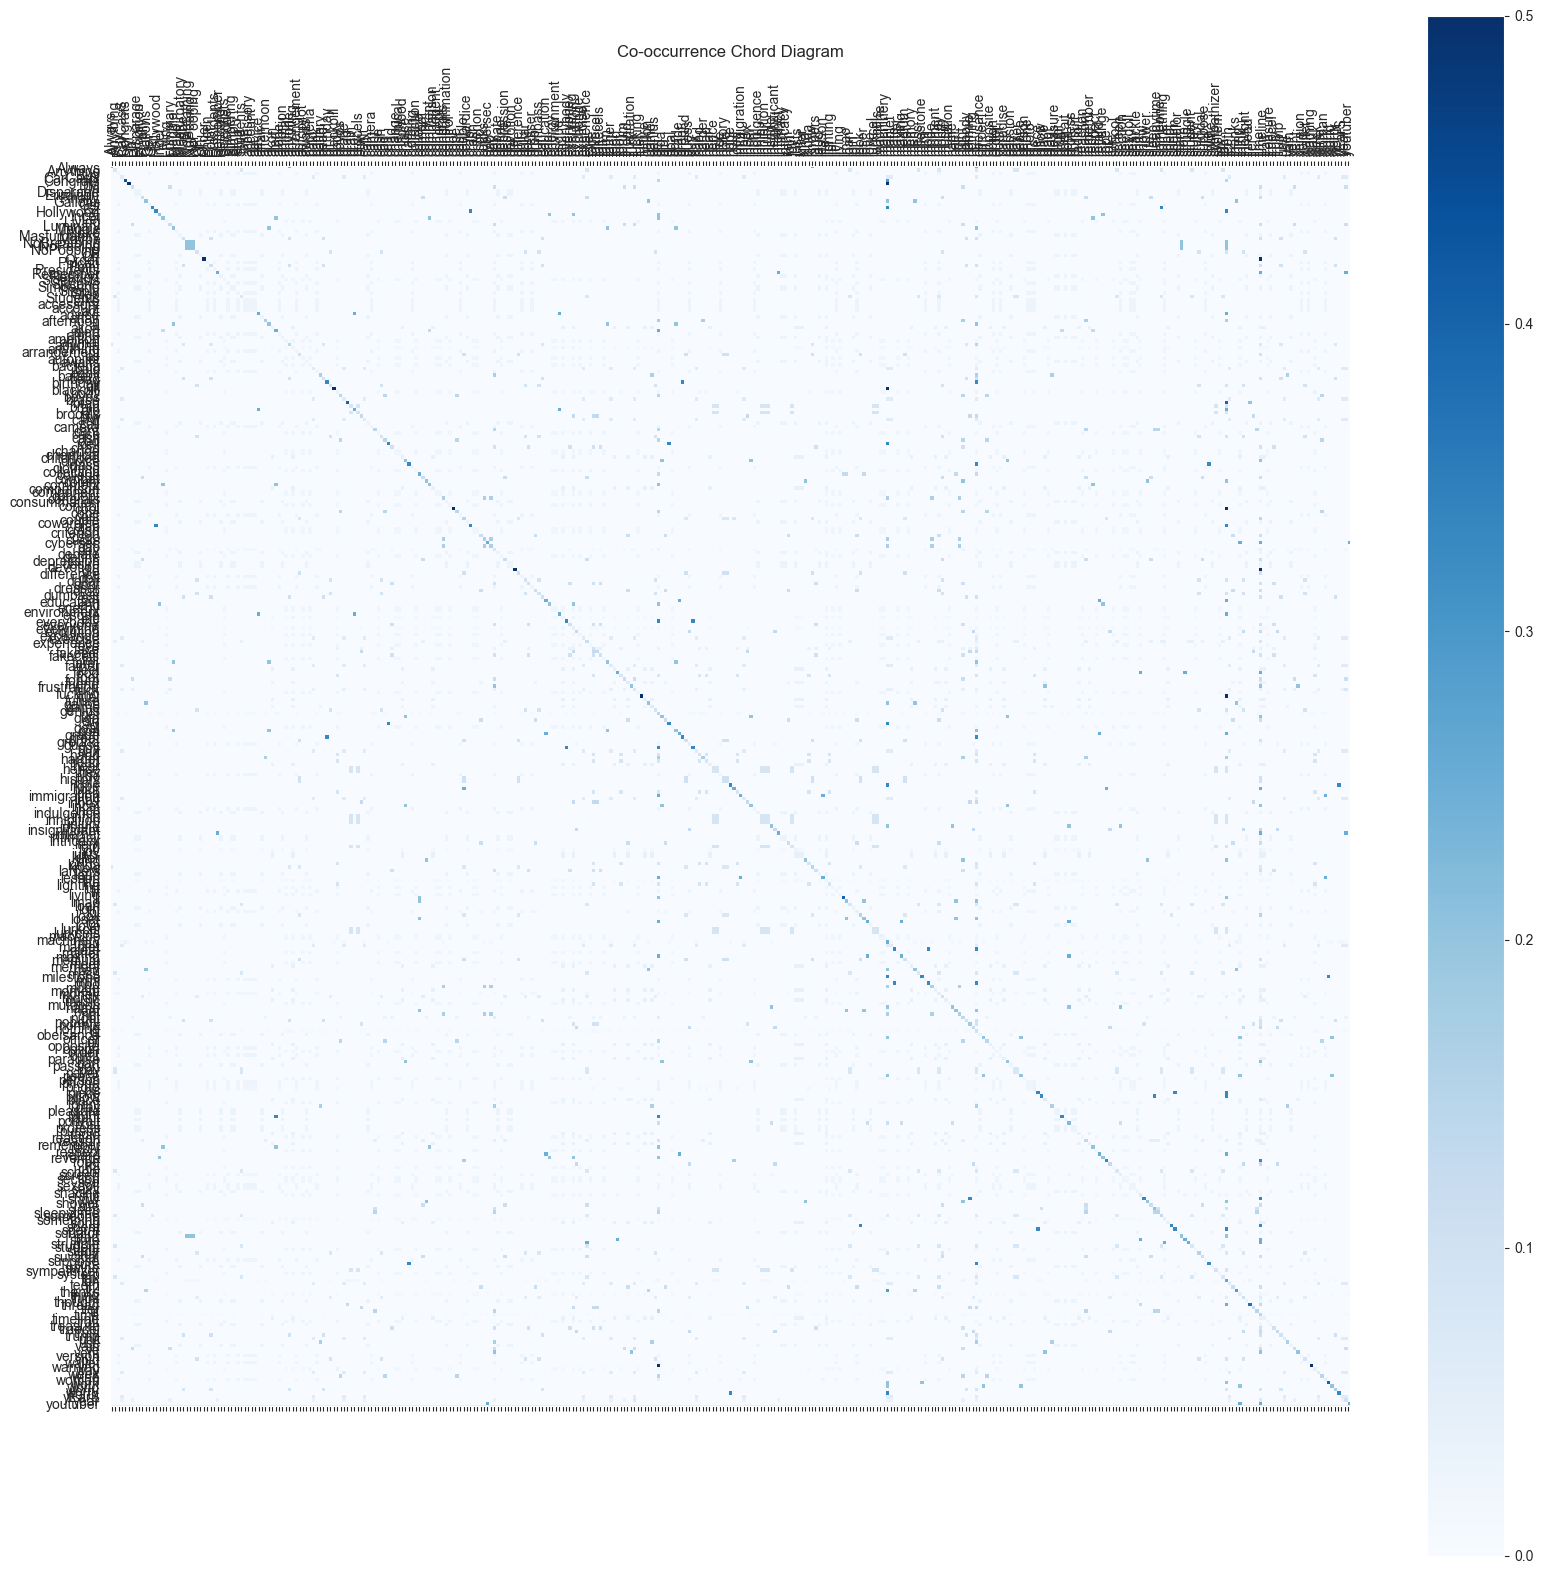

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm

# Assuming you have the 'co_occurrence_matrix' dataframe

# Get the topic names from the co-occurrence matrix
topics = co_occurrence_matrix.columns

# Compute the total co-occurrence count for each topic
total_counts = co_occurrence_matrix.sum(axis=1)

# Normalize the co-occurrence matrix
normalized_matrix = co_occurrence_matrix.div(total_counts, axis=0)

# Create the chord diagram
fig, ax = plt.subplots(figsize=(20, 20))
chord = ax.matshow(normalized_matrix, cmap=cm.get_cmap('Blues'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)

# Display the chord diagram
plt.show()


In [39]:
# Create co-occurrence matrix
mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df['main_topics']), columns=mlb.classes_, index=df.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 600

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array

array([], shape=(0, 0), dtype=float64)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3001993611.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3001993611.py:5: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3001993611.py:5: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))


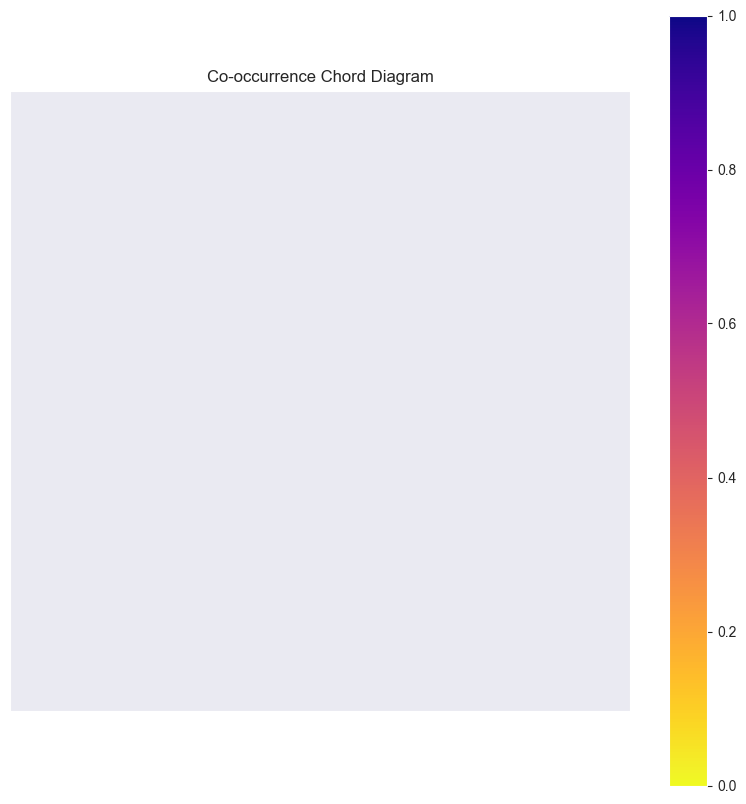

In [40]:
from matplotlib import cm

# Create the chord diagram
fig, ax = plt.subplots(figsize=(10, 10))
chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("test.svg")
# Display the chord diagram
plt.show()



# Comparative study


## produce 3 of these: 1 for ultra-right, 1 for ethnic groups; 1 for the rest.

In [93]:
import datetime
df = i.incel_posts

# alternate fix is to load the data with another pandas backend. This is more memory-hungry however and the initial load is slower as well.
df = load_incel_parquet(dtype_backend='numpy_nullable').incel_posts
df[(df['time_posted']>=datetime.datetime(2023,3,3)) & (df['time_posted']<=datetime.datetime(2023,3,4))]

df

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
0,1,post-8897672,0,2022-06-02 01:02:35,Or maybe she just realized Chad will never com...,"<div class=""message-content js-messageContent""...",0,1
1,2,post-8897678,1,2022-06-02 01:04:16,Ofc Chad will never commit to a crazy bpd toilet.,"<div class=""message-content js-messageContent""...",0,2
2,3,post-8897741,2,2022-06-02 01:12:32,Ill give her a ride in exchange for some head.,"<div class=""message-content js-messageContent""...",0,3
3,4,post-8897798,0,2022-06-02 01:20:35,A man doing the same thing would have been sub...,"<div class=""message-content js-messageContent""...",0,4
4,5,post-8898099,3,2022-06-02 02:25:56,ControlledInsanity said: A man doing the ...,"<div class=""message-content js-messageContent""...",0,5
...,...,...,...,...,...,...,...,...
2266019,2266019,post-65986,1111,2017-12-01 00:25:46,WarmIncelation said: From my perspective ...,"<div class=""message-content js-messageContent""...",125921,33
2266020,2266020,post-66068,444,2017-12-01 01:00:02,universallyabhorred said: Finally it is w...,"<div class=""message-content js-messageContent""...",125921,34
2266021,2266021,post-66078,1111,2017-12-01 01:03:54,nausea said: I am sure the admin and the ...,"<div class=""message-content js-messageContent""...",125921,35
2266022,2266022,post-66110,444,2017-12-01 01:23:43,universallyabhorred said: Admins don't gi...,"<div class=""message-content js-messageContent""...",125921,36


In [94]:
def remove_rows_without_words(dataframe, word_list, column_name):
    return dataframe[dataframe[column_name].apply(lambda x: any(word in x for word in word_list))]

In [95]:
#initialise lists
storm_list = ["stormfrontcel","nazicel","strormfrontcel","altrightcel","nationalistcel","stromfrontcel","antisemiticcel","rightcel","antisemeticcel","whitecel","jewcel","negroidcel","whitenationalistcel","kebabcel"]

# Call the function to remove rows without words from the list
df_storm = remove_rows_without_words(df, storm_list, 'post_content')
df_storm

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
5283,6932,post-5468604,408,2020-09-13 14:50:44,chaddam vs whitecel in japan. Thoughts?,"<div class=""message-content js-messageContent""...",310,4
8652,6933,post-5468606,407,2020-09-13 14:51:05,Algeriancel said: chaddam vs whitecel in ...,"<div class=""message-content js-messageContent""...",310,5
8894,11637,post-8835280,13,2022-05-22 15:59:09,I'm a whitecel and I am here. Doesn't that bea...,"<div class=""message-content js-messageContent""...",498,3
8911,11660,post-8838330,946,2022-05-23 02:44:41,If it was a manelt whitecel she would vomit on...,"<div class=""message-content js-messageContent""...",498,26
10711,13781,post-654616,1584,2018-04-19 12:20:47,Women are the fairer sex. They're such angels....,"<div class=""message-content js-messageContent""...",622,1
...,...,...,...,...,...,...,...,...
2261337,2259532,post-3163203,218,2019-10-14 10:40:09,ThisLifeKillsMe said: If hitler won menge...,"<div class=""message-content js-messageContent""...",125558,20
2261352,2259557,post-3488133,315,2019-12-17 23:12:49,"Bleachcel said: Uh oh, ur gonna trigger t...","<div class=""message-content js-messageContent""...",125558,45
2263653,2263428,post-8190514,2735,2022-03-05 03:21:20,MarquisDeSade said: European neopagan rec...,"<div class=""message-content js-messageContent""...",125801,54
2263654,2263429,post-8190525,389,2022-03-05 03:22:52,advik97 said: thank you mate but i still ...,"<div class=""message-content js-messageContent""...",125801,55


In [96]:
#initialise lists
ethnic_list =["ethniccel","blackcel","ricecel","currycel","ethnicel","muslimcel","arabcel","browncel","spanishcel","africancel","thaicel","persiancel","polecel","pakicel"]

# Call the function to remove rows without words from the list
df_ethnic = remove_rows_without_words(df, ethnic_list, 'post_content')
df_ethnic

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread
291,238,post-5883880,116,2020-11-14 15:59:09,Means some how some ricecel go to curryland an...,"<div class=""message-content js-messageContent""...",10,1
297,242,post-5883933,9,2020-11-14 16:02:04,gymletethnicel said: Time to k pop max C...,"<div class=""message-content js-messageContent""...",10,5
307,248,post-5884089,121,2020-11-14 16:10:32,gymletethnicel said: Time to k pop max C...,"<div class=""message-content js-messageContent""...",10,11
308,249,post-5885925,122,2020-11-14 18:49:48,Transcended Trucel said: Means some how s...,"<div class=""message-content js-messageContent""...",10,12
315,250,post-5885964,123,2020-11-14 18:53:23,gymletethnicel said: Time to k pop max C...,"<div class=""message-content js-messageContent""...",10,13
...,...,...,...,...,...,...,...,...
2265023,2264710,post-3795684,1076,2020-02-08 16:20:02,i will pm gymletethnicel said: Go ahead....,"<div class=""message-content js-messageContent""...",125844,94
2265311,2264955,post-10261627,146,2022-12-17 17:22:05,thespanishcel said: If you're not shitpos...,"<div class=""message-content js-messageContent""...",125869,6
2265312,2264957,post-10282801,396,2022-12-21 02:50:28,thespanishcel said: If you're not shitpos...,"<div class=""message-content js-messageContent""...",125869,8
2265320,2264968,post-10456617,94,2023-01-18 16:45:10,thespanishcel said: Hugely popular s...,"<div class=""message-content js-messageContent""...",125869,19


In [97]:
# Filter these groups using previously defined methods
df_storm['post_content_clean'] = df_storm['post_html']
df_ethnic['post_content_clean'] = df_ethnic['post_html']

# run the methods
# remove the HTML stuff from df_storm
df_storm['post_content_clean'] = df_storm['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

df_storm['post_content_clean']

# remove the HTML stuff from df_ethnic
df_ethnic['post_content_clean'] = df_ethnic['post_content_clean']\
    .apply(lambda x: BeautifulSoup(x, 'html.parser')
           .find('div', class_='bbWrapper')
           .find_all(string=True, recursive=False))\
    .apply(lambda x: ' '.join(x))

df_ethnic['post_content_clean']
df_ethnic

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/4089834795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storm['post_content_clean'] = df_storm['post_html']
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/4089834795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ethnic['post_content_clean'] = df_ethnic['post_html']
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/4089834795.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean
291,238,post-5883880,116,2020-11-14 15:59:09,Means some how some ricecel go to curryland an...,"<div class=""message-content js-messageContent""...",10,1,Means some how some ricecel go to curryland an...
297,242,post-5883933,9,2020-11-14 16:02:04,gymletethnicel said: Time to k pop max C...,"<div class=""message-content js-messageContent""...",10,5,Kek
307,248,post-5884089,121,2020-11-14 16:10:32,gymletethnicel said: Time to k pop max C...,"<div class=""message-content js-messageContent""...",10,11,
308,249,post-5885925,122,2020-11-14 18:49:48,Transcended Trucel said: Means some how s...,"<div class=""message-content js-messageContent""...",10,12,\nHmm aren’t there quite a few ricemen in nort...
315,250,post-5885964,123,2020-11-14 18:53:23,gymletethnicel said: Time to k pop max C...,"<div class=""message-content js-messageContent""...",10,13,
...,...,...,...,...,...,...,...,...,...
2265023,2264710,post-3795684,1076,2020-02-08 16:20:02,i will pm gymletethnicel said: Go ahead....,"<div class=""message-content js-messageContent""...",125844,94,i will pm \n i will pm you a book
2265311,2264955,post-10261627,146,2022-12-17 17:22:05,thespanishcel said: If you're not shitpos...,"<div class=""message-content js-messageContent""...",125869,6,No
2265312,2264957,post-10282801,396,2022-12-21 02:50:28,thespanishcel said: If you're not shitpos...,"<div class=""message-content js-messageContent""...",125869,8,He is 16
2265320,2264968,post-10456617,94,2023-01-18 16:45:10,thespanishcel said: Hugely popular s...,"<div class=""message-content js-messageContent""...",125869,19,this is still popular in areas that lag behind...


In [98]:
# Remove stop words
df_storm.post_content_clean = df_storm.post_content_clean.apply(remove_stop_words);
df_ethnic.post_content_clean = df_ethnic.post_content_clean.apply(remove_stop_words);

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/641600894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storm.post_content_clean = df_storm.post_content_clean.apply(remove_stop_words);
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/641600894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ethnic.post_content_clean = df_ethnic.post_content_clean.apply(remove_stop_words);


In [103]:
## Remove special symbols
df_storm['post_content_clean'] = df_storm['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

## Remove named entities from 'post_content' column
df_storm['post_content_clean'] = df_storm['post_content_clean'].apply(remove_named_entities)

## Function to remove one-letter long words
df_storm['word_usage'] = df_storm.post_content_clean.apply(get_word_usage)

# Remove rows with lists containing only one value
df_storm['word_usage'] = df_storm['word_usage'].apply(lambda x: x if len(x) > 1 else np.nan)
df_storm.dropna(subset=['word_usage'], inplace=True)
df_storm

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/2004961301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storm['post_content_clean'] = df_storm['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/2004961301.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_storm['post_content_clean'] = df_storm['post_content_clean'].apply(remove_named_entities)
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage
5283,6932,post-5468604,408,2020-09-13 14:50:44,chaddam vs whitecel in japan. Thoughts?,"<div class=""message-content js-messageContent""...",310,4,chaddam vs whitecel japan Thoughts,"{'chaddam': 1, 'vs': 1, 'whitecel': 1, 'japan'..."
8894,11637,post-8835280,13,2022-05-22 15:59:09,I'm a whitecel and I am here. Doesn't that bea...,"<div class=""message-content js-messageContent""...",498,3,m whitecel nt beat hypothesis,"{'m': 1, 'whitecel': 1, 'nt': 1, 'beat': 1, 'h..."
8911,11660,post-8838330,946,2022-05-23 02:44:41,If it was a manelt whitecel she would vomit on...,"<div class=""message-content js-messageContent""...",498,26,manelt whitecel would vomit spot,"{'manelt': 1, 'whitecel': 1, 'would': 1, 'vomi..."
10711,13781,post-654616,1584,2018-04-19 12:20:47,Women are the fairer sex. They're such angels....,"<div class=""message-content js-messageContent""...",622,1,Women fairer sex re angels officials say preli...,"{'Women': 1, 'fairer': 1, 'sex': 1, 're': 1, '..."
29770,24431,post-3547278,834,2019-12-29 00:54:42,FlamingCel said: They must be future grey...,"<div class=""message-content js-messageContent""...",1134,27,ur profile pic gon na make put little whitecel...,"{'ur': 1, 'profile': 1, 'pic': 1, 'gon': 1, 'n..."
...,...,...,...,...,...,...,...,...,...,...
2261337,2259532,post-3163203,218,2019-10-14 10:40:09,ThisLifeKillsMe said: If hitler won menge...,"<div class=""message-content js-messageContent""...",125558,20,Probably winning war would kill ugly people le...,"{'Probably': 1, 'winning': 1, 'war': 1, 'would..."
2261352,2259557,post-3488133,315,2019-12-17 23:12:49,"Bleachcel said: Uh oh, ur gonna trigger t...","<div class=""message-content js-messageContent""...",125558,45,foids time worship chad like nazis foids calle...,"{'foids': 2, 'time': 1, 'worship': 1, 'chad': ..."
2263653,2263428,post-8190514,2735,2022-03-05 03:21:20,MarquisDeSade said: European neopagan rec...,"<div class=""message-content js-messageContent""...",125801,54,thank mate still think whitecels fakecel ask e...,"{'thank': 1, 'mate': 1, 'still': 1, 'think': 1..."
2263654,2263429,post-8190525,389,2022-03-05 03:22:52,advik97 said: thank you mate but i still ...,"<div class=""message-content js-messageContent""...",125801,55,understand whitecel still think ethnicels full...,"{'understand': 1, 'whitecel': 1, 'still': 2, '..."


In [100]:
df_storm

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage
5283,6932,post-5468604,408,2020-09-13 14:50:44,chaddam vs whitecel in japan. Thoughts?,"<div class=""message-content js-messageContent""...",310,4,chaddam vs whitecel japan Thoughts,"{'chaddam': 1, 'vs': 1, 'whitecel': 1, 'japan'..."
8652,6933,post-5468606,407,2020-09-13 14:51:05,Algeriancel said: chaddam vs whitecel in ...,"<div class=""message-content js-messageContent""...",310,5,obviously,{'obviously': 1}
8894,11637,post-8835280,13,2022-05-22 15:59:09,I'm a whitecel and I am here. Doesn't that bea...,"<div class=""message-content js-messageContent""...",498,3,m whitecel nt beat hypothesis,"{'m': 1, 'whitecel': 1, 'nt': 1, 'beat': 1, 'h..."
8911,11660,post-8838330,946,2022-05-23 02:44:41,If it was a manelt whitecel she would vomit on...,"<div class=""message-content js-messageContent""...",498,26,manelt whitecel would vomit spot,"{'manelt': 1, 'whitecel': 1, 'would': 1, 'vomi..."
10711,13781,post-654616,1584,2018-04-19 12:20:47,Women are the fairer sex. They're such angels....,"<div class=""message-content js-messageContent""...",622,1,Women fairer sex re angels officials say preli...,"{'Women': 1, 'fairer': 1, 'sex': 1, 're': 1, '..."
...,...,...,...,...,...,...,...,...,...,...
2261337,2259532,post-3163203,218,2019-10-14 10:40:09,ThisLifeKillsMe said: If hitler won menge...,"<div class=""message-content js-messageContent""...",125558,20,Probably winning war would kill ugly people le...,"{'Probably': 1, 'winning': 1, 'war': 1, 'would..."
2261352,2259557,post-3488133,315,2019-12-17 23:12:49,"Bleachcel said: Uh oh, ur gonna trigger t...","<div class=""message-content js-messageContent""...",125558,45,foids time worship chad like nazis foids calle...,"{'foids': 2, 'time': 1, 'worship': 1, 'chad': ..."
2263653,2263428,post-8190514,2735,2022-03-05 03:21:20,MarquisDeSade said: European neopagan rec...,"<div class=""message-content js-messageContent""...",125801,54,thank mate still think whitecels fakecel ask e...,"{'thank': 1, 'mate': 1, 'still': 1, 'think': 1..."
2263654,2263429,post-8190525,389,2022-03-05 03:22:52,advik97 said: thank you mate but i still ...,"<div class=""message-content js-messageContent""...",125801,55,understand whitecel still think ethnicels full...,"{'understand': 1, 'whitecel': 1, 'still': 2, '..."


In [66]:
## Remove special symbols
df_ethnic['post_content_clean'] = df_ethnic['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

## Remove named entities from 'post_content' column
df_ethnic['post_content_clean'] = df_ethnic['post_content_clean'].apply(remove_named_entities)

## Function to remove one-letter long words
df_ethnic['word_usage'] = df_ethnic.post_content_clean.apply(get_word_usage)

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3967305420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ethnic['post_content_clean'] = df_ethnic['post_content_clean'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3967305420.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ethnic['post_content_clean'] = df_ethnic['post_content_clean'].apply(remove_named_entities)
/var/folders/n4/r2klyggn0y51895f8rrmhnp80000g

In [111]:
%%time
# Word usage statistics
def get_word_usage(text):
    tokens = word_tokenize(text)
    fdist = FreqDist(tokens)
    return fdist

df_storm['word_usage'] = df_storm.post_content_clean.apply(get_word_usage)

CPU times: user 189 ms, sys: 36.3 ms, total: 225 ms
Wall time: 232 ms


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [112]:
%%time
# Extract main topics
df_storm['main_topics'] = df_storm.post_content_clean.apply(extract_main_topics)

## delete main topics containing 1 letter
df_storm['main_topics'] = df_storm['main_topics'].apply(lambda x: x if len(x) > 1 else np.nan)
df_storm.dropna(subset=['main_topics'], inplace=True)
df_storm

CPU times: user 1.98 s, sys: 72 ms, total: 2.05 s
Wall time: 2.29 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
5283,6932,post-5468604,408,2020-09-13 14:50:44,chaddam vs whitecel in japan. Thoughts?,"<div class=""message-content js-messageContent""...",310,4,chaddam vs whitecel japan Thoughts,"{'chaddam': 1, 'vs': 1, 'whitecel': 1, 'japan'...","[chaddam, v, japan, Thoughts]"
8894,11637,post-8835280,13,2022-05-22 15:59:09,I'm a whitecel and I am here. Doesn't that bea...,"<div class=""message-content js-messageContent""...",498,3,m whitecel nt beat hypothesis,"{'m': 1, 'whitecel': 1, 'nt': 1, 'beat': 1, 'h...","[m, whitecel, beat, hypothesis]"
8911,11660,post-8838330,946,2022-05-23 02:44:41,If it was a manelt whitecel she would vomit on...,"<div class=""message-content js-messageContent""...",498,26,manelt whitecel would vomit spot,"{'manelt': 1, 'whitecel': 1, 'would': 1, 'vomi...","[manelt, whitecel, spot]"
10711,13781,post-654616,1584,2018-04-19 12:20:47,Women are the fairer sex. They're such angels....,"<div class=""message-content js-messageContent""...",622,1,Women fairer sex re angels officials say preli...,"{'Women': 1, 'fairer': 1, 'sex': 1, 're': 1, '...","[Women, sex, re, official, evidence, show, cra..."
29770,24431,post-3547278,834,2019-12-29 00:54:42,FlamingCel said: They must be future grey...,"<div class=""message-content js-messageContent""...",1134,27,ur profile pic gon na make put little whitecel...,"{'ur': 1, 'profile': 1, 'pic': 1, 'gon': 1, 'n...","[profile, pic, gon, whitecels, desk]"
...,...,...,...,...,...,...,...,...,...,...,...
2261337,2259532,post-3163203,218,2019-10-14 10:40:09,ThisLifeKillsMe said: If hitler won menge...,"<div class=""message-content js-messageContent""...",125558,20,Probably winning war would kill ugly people le...,"{'Probably': 1, 'winning': 1, 'war': 1, 'would...","[war, people, people, ancestor, eugenics]"
2261352,2259557,post-3488133,315,2019-12-17 23:12:49,"Bleachcel said: Uh oh, ur gonna trigger t...","<div class=""message-content js-messageContent""...",125558,45,foids time worship chad like nazis foids calle...,"{'foids': 2, 'time': 1, 'worship': 1, 'chad': ...","[foids, time, worship, foids, Wahmen]"
2263653,2263428,post-8190514,2735,2022-03-05 03:21:20,MarquisDeSade said: European neopagan rec...,"<div class=""message-content js-messageContent""...",125801,54,thank mate still think whitecels fakecel ask e...,"{'thank': 1, 'mate': 1, 'still': 1, 'think': 1...","[thank, mate, whitecels, ll, time]"
2263654,2263429,post-8190525,389,2022-03-05 03:22:52,advik97 said: thank you mate but i still ...,"<div class=""message-content js-messageContent""...",125801,55,understand whitecel still think ethnicels full...,"{'understand': 1, 'whitecel': 1, 'still': 2, '...","[understand, whitecel, ethnicels, shit, guy, way]"


In [114]:
%%time
# Word usage statistics


df_ethnic['word_usage'] = df_ethnic.post_content_clean.apply(get_word_usage)
df_ethnic

CPU times: user 3.05 s, sys: 130 ms, total: 3.18 s
Wall time: 3.41 s


<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,main_topics,word_usage
291,238,post-5883880,116,2020-11-14 15:59:09,Means some how some ricecel go to curryland an...,"<div class=""message-content js-messageContent""...",10,1,Means ricecel go curryland impregnated foid . ...,"[Means, curryland, foid, JFL]","{'Means': 1, 'ricecel': 1, 'go': 1, 'curryland..."
308,249,post-5885925,122,2020-11-14 18:49:48,Transcended Trucel said: Means some how s...,"<div class=""message-content js-messageContent""...",10,12,Hmm ’ quite ricemen north-eastern India ?,"[Hmm, ’, India]","{'Hmm': 1, '’': 1, 'quite': 1, 'ricemen': 1, '..."
868,1198,post-4903862,399,2020-06-30 01:16:49,So where are all the JBC denying currycels huh?,"<div class=""message-content js-messageContent""...",64,29,JBC denying currycels huh ?,"[JBC, currycels]","{'JBC': 1, 'denying': 1, 'currycels': 1, 'huh'..."
937,722,post-8321744,116,2022-03-27 17:01:43,ethniccel1 said: This is normal. Many job...,"<div class=""message-content js-messageContent""...",43,11,'s fault . need pull bootstraps,"[fault, bootstrap]","{''s': 1, 'fault': 1, '.': 1, 'need': 1, 'pull..."
942,724,post-8321800,116,2022-03-27 17:20:56,ethniccel1 said: Aha and in the meantime ...,"<div class=""message-content js-messageContent""...",43,13,ogre em,"[ogre, em]","{'ogre': 1, 'em': 1}"
...,...,...,...,...,...,...,...,...,...,...,...
2265014,2264707,post-3794883,39,2020-02-08 13:40:40,gymletethnicel said: Number 3 is based th...,"<div class=""message-content js-messageContent""...",125844,91,'s one actually makes sense tbh Ok,"[sense, tbh, Ok]","{''s': 1, 'one': 1, 'actually': 1, 'makes': 1,..."
2265022,2264709,post-3795591,1076,2020-02-08 15:56:22,gymletethnicel said: @MuslimCell Click t...,"<div class=""message-content js-messageContent""...",125844,93,"1for allah sake , ? ready . right answer insha...","[sake, answer, inshallah, sun, sinking, muddy,...","{'1for': 1, 'allah': 1, 'sake': 1, ',': 1, '?'..."
2265023,2264710,post-3795684,1076,2020-02-08 16:20:02,i will pm gymletethnicel said: Go ahead....,"<div class=""message-content js-messageContent""...",125844,94,pm pm book,"[pm, pm, book]","{'pm': 2, 'book': 1}"
2265320,2264968,post-10456617,94,2023-01-18 16:45:10,thespanishcel said: Hugely popular s...,"<div class=""message-content js-messageContent""...",125869,19,still popular areas lag behind western culture...,"[area, culture, area, site, function, normies,...","{'still': 1, 'popular': 1, 'areas': 2, 'lag': ..."


In [115]:
%%time
# Extract main topics
df_ethnic['main_topics'] = df_ethnic.post_content_clean.apply(extract_main_topics)

## delete main topics containing 1 letter
df_ethnic['main_topics'] = df_ethnic['main_topics'].apply(lambda x: x if len(x) > 1 else np.nan)
df_ethnic.dropna(subset=['main_topics'], inplace=True)
df_ethnic

CPU times: user 18 s, sys: 629 ms, total: 18.7 s
Wall time: 18.9 s


<timed exec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,main_topics,word_usage
291,238,post-5883880,116,2020-11-14 15:59:09,Means some how some ricecel go to curryland an...,"<div class=""message-content js-messageContent""...",10,1,Means ricecel go curryland impregnated foid . ...,"[Means, curryland, foid, JFL]","{'Means': 1, 'ricecel': 1, 'go': 1, 'curryland..."
308,249,post-5885925,122,2020-11-14 18:49:48,Transcended Trucel said: Means some how s...,"<div class=""message-content js-messageContent""...",10,12,Hmm ’ quite ricemen north-eastern India ?,"[Hmm, ’, India]","{'Hmm': 1, '’': 1, 'quite': 1, 'ricemen': 1, '..."
868,1198,post-4903862,399,2020-06-30 01:16:49,So where are all the JBC denying currycels huh?,"<div class=""message-content js-messageContent""...",64,29,JBC denying currycels huh ?,"[JBC, currycels]","{'JBC': 1, 'denying': 1, 'currycels': 1, 'huh'..."
937,722,post-8321744,116,2022-03-27 17:01:43,ethniccel1 said: This is normal. Many job...,"<div class=""message-content js-messageContent""...",43,11,'s fault . need pull bootstraps,"[fault, bootstrap]","{''s': 1, 'fault': 1, '.': 1, 'need': 1, 'pull..."
942,724,post-8321800,116,2022-03-27 17:20:56,ethniccel1 said: Aha and in the meantime ...,"<div class=""message-content js-messageContent""...",43,13,ogre em,"[ogre, em]","{'ogre': 1, 'em': 1}"
...,...,...,...,...,...,...,...,...,...,...,...
2265014,2264707,post-3794883,39,2020-02-08 13:40:40,gymletethnicel said: Number 3 is based th...,"<div class=""message-content js-messageContent""...",125844,91,'s one actually makes sense tbh Ok,"[sense, tbh, Ok]","{''s': 1, 'one': 1, 'actually': 1, 'makes': 1,..."
2265022,2264709,post-3795591,1076,2020-02-08 15:56:22,gymletethnicel said: @MuslimCell Click t...,"<div class=""message-content js-messageContent""...",125844,93,"1for allah sake , ? ready . right answer insha...","[sake, answer, inshallah, sun, sinking, muddy,...","{'1for': 1, 'allah': 1, 'sake': 1, ',': 1, '?'..."
2265023,2264710,post-3795684,1076,2020-02-08 16:20:02,i will pm gymletethnicel said: Go ahead....,"<div class=""message-content js-messageContent""...",125844,94,pm pm book,"[pm, pm, book]","{'pm': 2, 'book': 1}"
2265320,2264968,post-10456617,94,2023-01-18 16:45:10,thespanishcel said: Hugely popular s...,"<div class=""message-content js-messageContent""...",125869,19,still popular areas lag behind western culture...,"[area, culture, area, site, function, normies,...","{'still': 1, 'popular': 1, 'areas': 2, 'lag': ..."


<Figure size 1000x600 with 0 Axes>

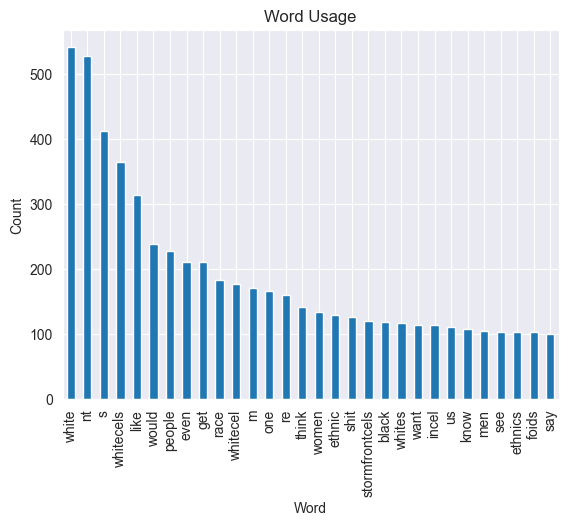

CPU times: user 2.43 s, sys: 107 ms, total: 2.54 s
Wall time: 2.55 s


In [118]:
%%time
# Visualize the word use (takes few minutes time)

storm_word_usage = df_storm['word_usage'].sum()
storm_word_df = pd.DataFrame.from_dict(storm_word_usage, orient='index', columns=['Count'])
storm_word_df = storm_word_df.sort_values(by='Count', ascending=False)

#plot only top 30
plt.figure(figsize=(10, 6))
storm_word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

In [121]:
# Take a sample ( too large)
df_ethnic_sample = df_ethnic#.sample(5000)

<Figure size 1000x600 with 0 Axes>

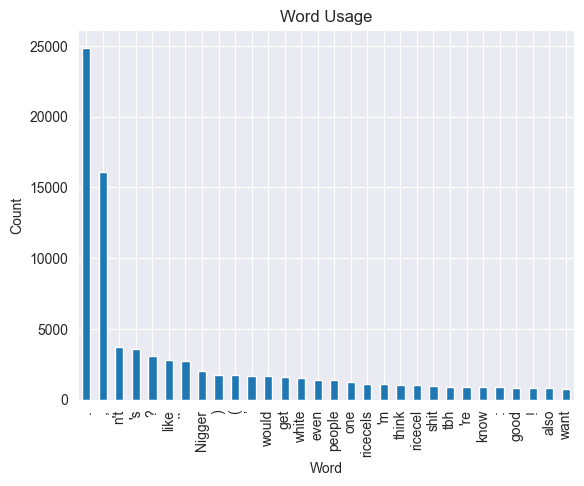

CPU times: user 1min 29s, sys: 620 ms, total: 1min 30s
Wall time: 1min 30s


In [123]:
%%time
# Visualize the word use (takes few minutes time)

ethnic_word_usage = df_ethnic_sample['word_usage'].sum()
ethnic_word_df = pd.DataFrame.from_dict(ethnic_word_usage, orient='index', columns=['Count'])
ethnic_word_df = ethnic_word_df.sort_values(by='Count', ascending=False)

#plot only top 30
plt.figure(figsize=(10, 6))
ethnic_word_df.head(30).plot(kind='bar', legend=False)
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Word Usage')
plt.show()

In [78]:
# select top 10 topics
storm_top_topics_list = storm_word_df.index.to_list()[:10]

# Function to check if a row contains any word from the top_topics_list
def contains_top_topic(row):
    for topic in storm_top_topics_list:
        if topic in row:
            return True
    return False

# Remove rows that don't contain words from the top_topics_list
df_storm = df_storm[df_storm['main_topics'].apply(contains_top_topic)]
df_storm

,post_id,post_id_str,poster_id,time_posted,post_content,post_html,thread_id,post_order_in_thread,post_content_clean,word_usage,main_topics
8894,11637,post-8835280,13,2022-05-22 15:59:09,I'm a whitecel and I am here. Doesn't that bea...,"<div class=""message-content js-messageContent""...",498,3,m whitecel nt beat hypothesis,"{'m': 1, 'whitecel': 1, 'nt': 1, 'beat': 1, 'h...","[m, whitecel, beat, hypothesis]"
8911,11660,post-8838330,946,2022-05-23 02:44:41,If it was a manelt whitecel she would vomit on...,"<div class=""message-content js-messageContent""...",498,26,manelt whitecel would vomit spot,"{'manelt': 1, 'whitecel': 1, 'would': 1, 'vomi...","[manelt, whitecel, spot]"
29770,24431,post-3547278,834,2019-12-29 00:54:42,FlamingCel said: They must be future grey...,"<div class=""message-content js-messageContent""...",1134,27,ur profile pic gon na make put little whitecel...,"{'ur': 1, 'profile': 1, 'pic': 1, 'gon': 1, 'n...","[profile, pic, gon, whitecels, desk]"
33519,42338,post-2960330,2307,2019-08-30 16:07:34,It's over for jewcels.,"<div class=""message-content js-messageContent""...",2101,2,s jewcels,"{'s': 1, 'jewcels': 1}","[s, jewcels]"
33835,42641,post-1674644,446,2018-11-07 10:46:41,I decided to make this thread in celebration o...,"<div class=""message-content js-messageContent""...",2122,1,decided make thread celebration site s first y...,"{'decided': 1, 'make': 1, 'thread': 1, 'celebr...","[make, thread, celebration, site, s, year, rev..."
...,...,...,...,...,...,...,...,...,...,...,...
2260262,2257755,post-10318718,255,2022-12-27 03:52:02,Khanivore said: Ima jbw too muahahahaha!!...,"<div class=""message-content js-messageContent""...",125493,65,Eh retard retard guess conflating race pill tr...,"{'Eh': 1, 'retard': 2, 'guess': 1, 'conflating...","[Eh, guess, race, pill, user, horseshit, bait,..."
2261337,2259532,post-3163203,218,2019-10-14 10:40:09,ThisLifeKillsMe said: If hitler won menge...,"<div class=""message-content js-messageContent""...",125558,20,Probably winning war would kill ugly people le...,"{'Probably': 1, 'winning': 1, 'war': 1, 'would...","[war, people, people, ancestor, eugenics]"
2263653,2263428,post-8190514,2735,2022-03-05 03:21:20,MarquisDeSade said: European neopagan rec...,"<div class=""message-content js-messageContent""...",125801,54,thank mate still think whitecels fakecel ask e...,"{'thank': 1, 'mate': 1, 'still': 1, 'think': 1...","[thank, mate, whitecels, ll, time]"
2263654,2263429,post-8190525,389,2022-03-05 03:22:52,advik97 said: thank you mate but i still ...,"<div class=""message-content js-messageContent""...",125801,55,understand whitecel still think ethnicels full...,"{'understand': 1, 'whitecel': 1, 'still': 2, '...","[understand, whitecel, ethnicels, shit, guy, way]"


In [79]:
# Create co-occurrence matrix
mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df_storm['main_topics']), columns=mlb.classes_, index=df_storm.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 600

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array

array([[ 0,  0,  7, ...,  4,  5,  5],
       [ 0,  0,  1, ...,  2,  4,  1],
       [ 7,  1,  0, ...,  9,  7,  2],
       ...,
       [ 4,  2,  9, ...,  0, 29, 14],
       [ 5,  4,  7, ..., 29,  0,  7],
       [ 5,  1,  2, ..., 14,  7,  0]])

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/1635132388.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))


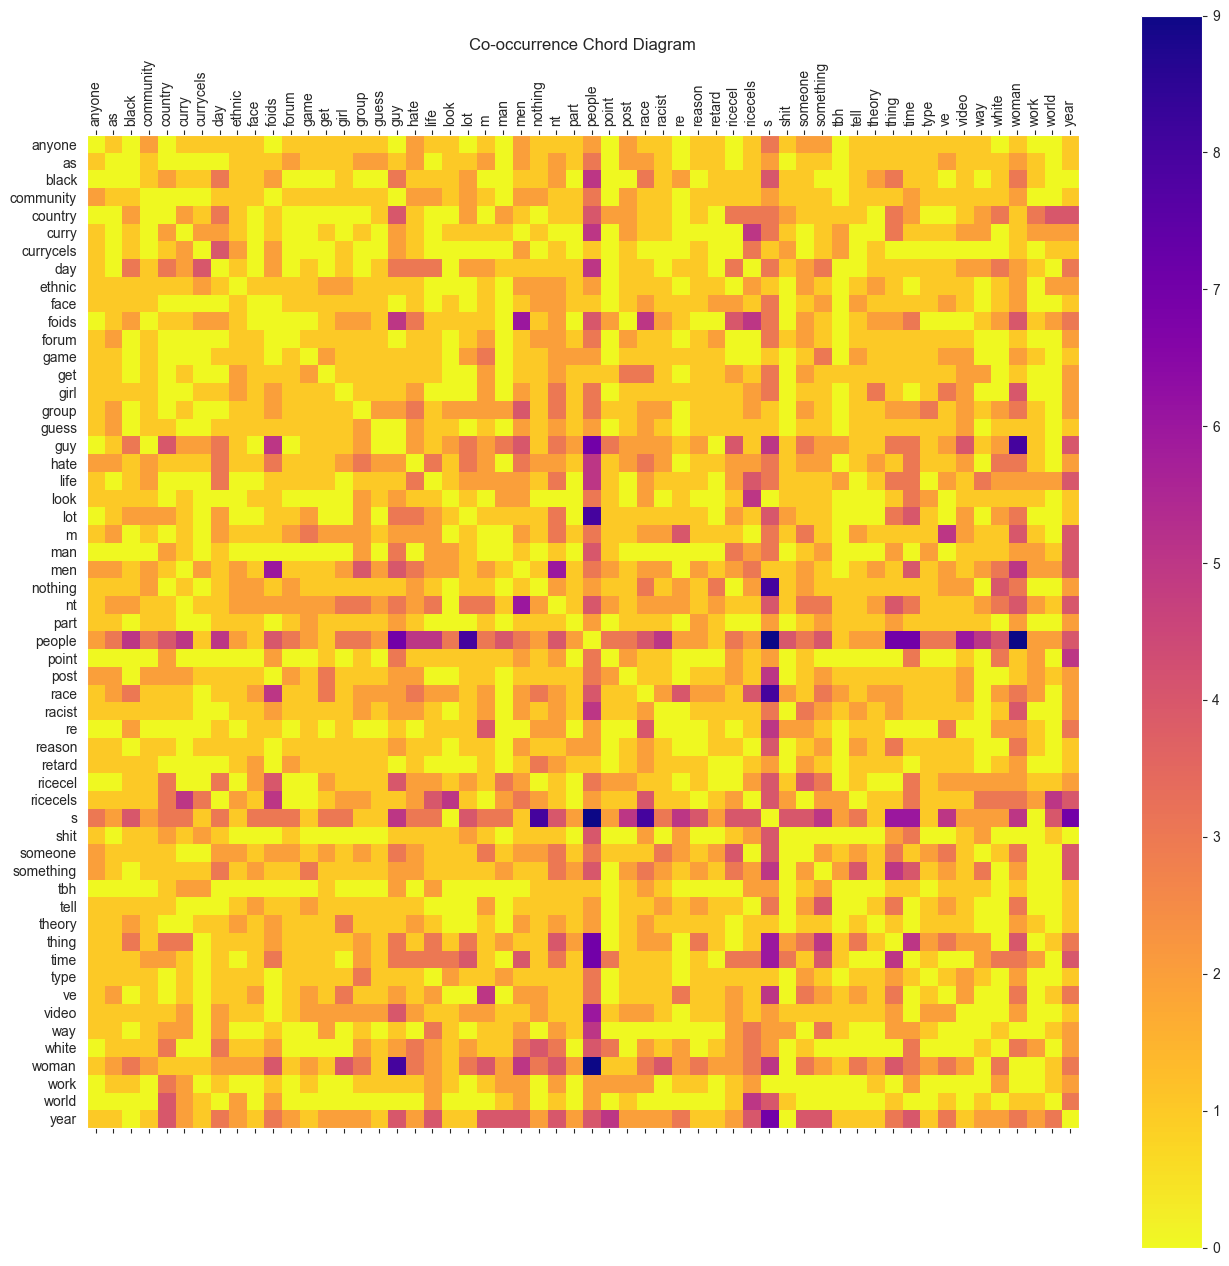

In [90]:
# Create the chord diagram
fig, ax = plt.subplots(figsize=(16, 16))
chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("storm_topics.svg")
# Display the chord diagram
plt.show()

In [91]:
# Create co-occurrence matrix
mlb = MultiLabelBinarizer()
co_occurrence_matrix = pd.DataFrame(mlb.fit_transform(df_ethnic['main_topics']), columns=mlb.classes_, index=df_ethnic.index)
co_occurrence_matrix = co_occurrence_matrix.T.dot(co_occurrence_matrix)

# Set a threshold for co-occurrence count
threshold = 200

# Compute the total co-occurrence count for each topic
co_occurrence_count = co_occurrence_matrix.sum(axis=1)

# Get the indices of topics with co-occurrence count above the threshold
indices_above_threshold = co_occurrence_count[co_occurrence_count > threshold].index

# Filter the co-occurrence matrix based on the indices above the threshold
filtered_matrix = co_occurrence_matrix.loc[indices_above_threshold, indices_above_threshold]

# Filtered matrix
topics = filtered_matrix.columns

# Filter the matrix values
co_occurrence_array = filtered_matrix.values

np.fill_diagonal(co_occurrence_array, 0)
co_occurrence_array

array([[0, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 1, 2],
       [0, 0, 0, ..., 1, 0, 3],
       [1, 1, 0, ..., 2, 3, 0]])

/var/folders/n4/r2klyggn0y51895f8rrmhnp80000gn/T/ipykernel_66970/3893614514.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))


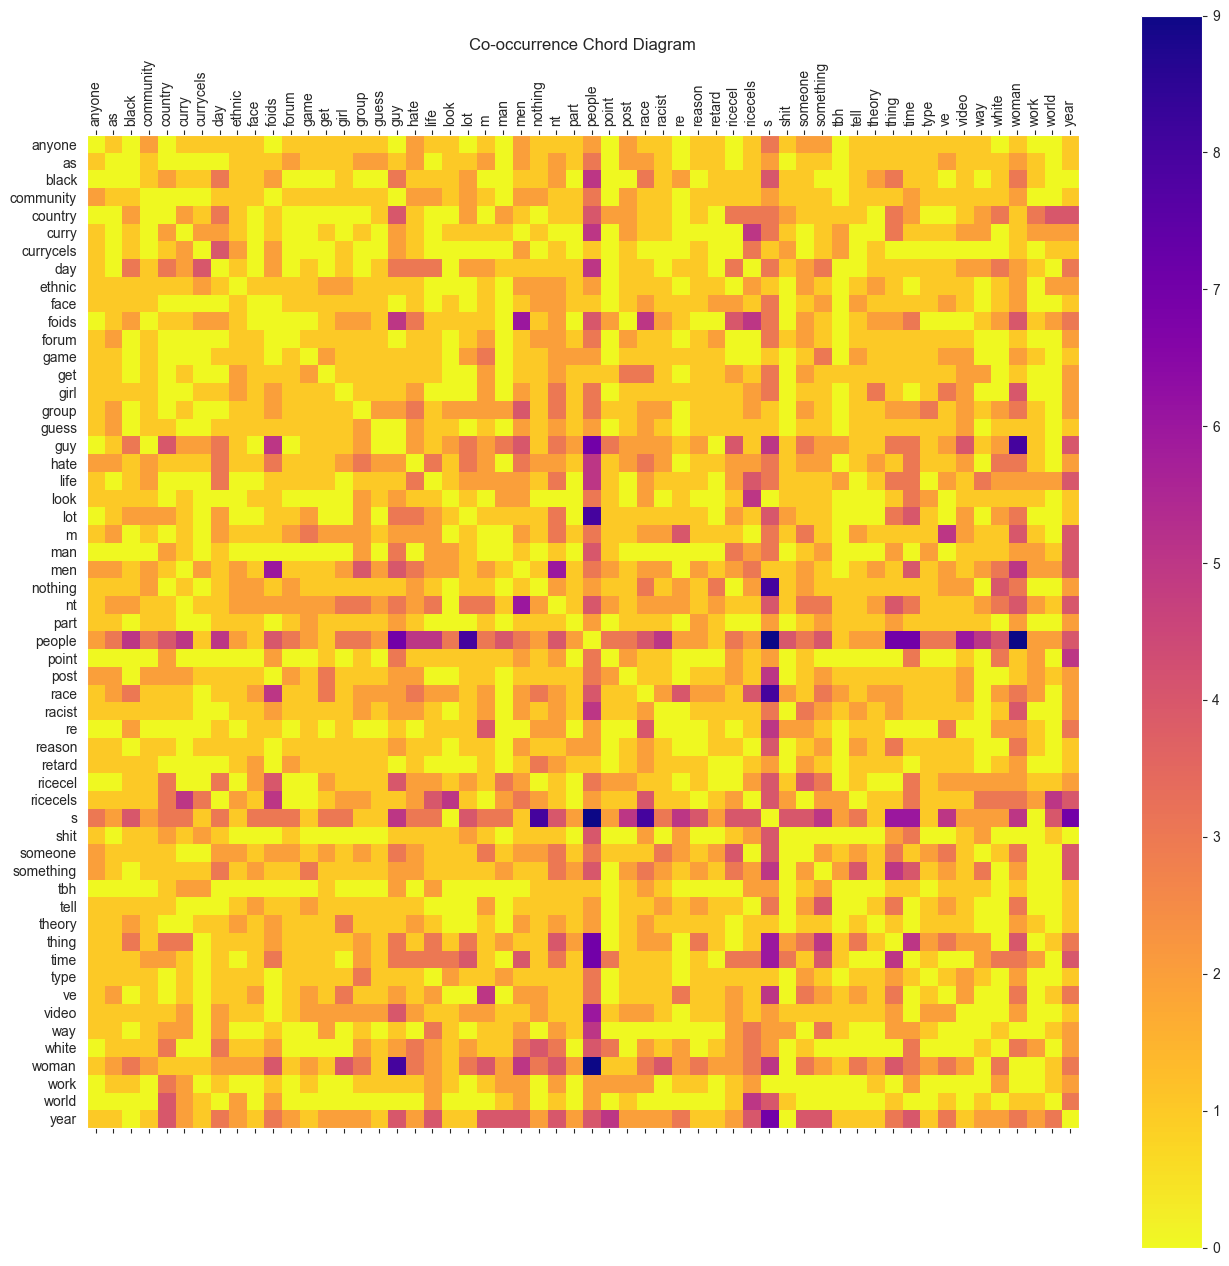

In [92]:
# Create the chord diagram
fig, ax = plt.subplots(figsize=(16, 16))
chord = ax.matshow(filtered_matrix, cmap=cm.get_cmap('plasma_r'))

# Customize the chord diagram
plt.xticks(range(len(topics)), topics, rotation=90)
plt.yticks(range(len(topics)), topics)
plt.colorbar(chord)

# Add a title to the chord diagram
plt.title('Co-occurrence Chord Diagram')
ax.grid(False)
plt.savefig("ethnic_topics.svg")
# Display the chord diagram
plt.show()

In [72]:
###################################################################################################

In [73]:
sorted_matrix = co_occurrence_matrix.sort_values(by=co_occurrence_matrix.columns.tolist(), axis=0, ascending=False)
#sorted_matrix = sorted_matrix[sorted_matrix.columns.tolist()]
sorted_matrix

,AC,ACTORS,ACTUALLY,AD,AI,ANIME,ARTICLE,ARTICLES,ATM,Abu,...,yeara,yelling,yes,yoghurt,youngcels,youre,youth,youtube,zoom,zoomers
start,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
tbh,1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
get,1,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
nobody,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
week,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sociopath,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
unaware,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tbhtbh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
shitposts,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
co_occurrence_sum = co_occurrence_matrix.sum(axis=1)

# Sort the co-occurrence matrix by the sum of co-occurrences
sorted_matrix = co_occurrence_matrix.loc[co_occurrence_sum.sort_values(ascending=False).index]

# Print the sorted co-occurrence matrix
print(sorted_matrix)

             AC  ACTORS  ACTUALLY  AD  AI  ANIME  ARTICLE  ARTICLES  ATM  Abu   
people        0       0         0   0   2      0        0         0    0    0  \
nt            0       0         0   0   1      0        0         0    0    1   
time          1       0         0   0   0      0        0         0    0    0   
woman         0       0         0   1   0      1        1         1    0    0   
get           1       0         0   1   0      0        1         1    0    0   
...          ..     ...       ...  ..  ..    ...      ...       ...  ...  ...   
suicidefuel   0       0         0   0   0      0        0         0    0    0   
back          0       0         0   0   0      0        0         0    0    0   
roping        0       0         0   0   0      0        0         0    0    0   
Rip           0       0         0   0   0      0        0         0    0    0   
famepill      0       0         0   0   0      0        0         0    0    0   

             ...  yeara  ye

### Now visualize topics based on users


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

s = i.incel_users
# covert date to numeric
s.user_joined = pd.to_datetime(s.user_joined)


# Select users who joined during first year
start_date = '2018-01-01'
end_date = '2018-03-01'
mask_old = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)
#print(s.loc[mask])

#save ID's of old users:
old_users = s.user_id.loc[mask_old].to_list()

# Select users who joined last year
mask_new = (s['user_joined'] > start_date) & (s['user_joined'] <= end_date)

#save ID's of new users:
new_users = s.user_id.loc[mask_new].to_list()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 14.3 MB/s eta 0:00:0000:0100:01
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [ ]:
# Assuming you have the 'temp' dataframe with the required columns

# Function to assign color based on user ID
def get_color(poster_id):
    if poster_id in old_users:
        return 'red'
    elif poster_id in new_users:
        return 'blue'
    else:
        return 'black'  # Default color

# Convert 'time_posted' column to datetime
temp['time_posted'] = pd.to_datetime(temp['time_posted'])

# Plotting the topics over time
plt.figure(figsize=(10, 6))
for index, row in temp.iterrows():
    print('test')
    plt.scatter(row['time_posted'], row['main_topics'], c=get_color(row['poster_id']))

plt.xlabel('Time Posted')
plt.ylabel('Main Topics')
plt.title('Topics over Time')

# Show the legend for color coding
plt.legend(['CSV File 1', 'CSV File 2'])

# Display the plot
plt.show()


In [ ]:
for index, row in temp.iterrows():
    print('test')
    plt.scatter(row['time_posted'], row['top_topic'])

In [ ]:
plt.scatter(temp.time_posted, temp.top_topic.astype(str))

In [ ]:
print(temp.time_posted.size)
print(temp.top_topic.size)


In [ ]:

# Function to remove items from lists except the first one
def remove_items_except_first(lst):
    if isinstance(lst, list) and len(lst) > 1:
        return [lst[0]]
    else:
        return lst

# Apply the function to the column containing lists
temp['top_topic'] = temp['main_topics'].apply(remove_items_except_first)
temp

In [ ]:
# need to group "i.incel_posts" by months and sum up the "Main topics"(created by topic modeling)
# make a scatter plot. X is dates and Y is rank of topic.
# color topics based on the user_id. if old - red, if new - blue


In [ ]:
s = i.incel_posts

In [ ]:
s.time_posted = pd.to_datetime(s.time_posted)

In [ ]:
temp.head(500).groupby(pd.Grouper(key="time_posted", freq="1M")).main_topics.sum().plot()

In [ ]:
from collections import Counter

temp.head(500).groupby(pd.Grouper(key="time_posted", freq="1M")).main_topics.sum(map(Counter, temp['main_topics']), Counter())

In [ ]:
all_topics_counter = sum(map(Counter, temp['main_topics']), Counter())
all_topics_counter.most_common(10)



In [ ]:
all_topics_counter.most_common(60)